# Numpy based Logistic Regression on Breast Cancer Data set

    - This is a custom implementation of Logistic Regression using Numpy 
    - This implements a numpy based forward and back propogation on breast cancer data set
    - Cool implementation and gives a good understanding of how to implement back propogation using chain rule.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
import random

def initialize():
    
    data = load_breast_cancer()
    X = data.data
    print ('Shape of X is ',X.shape)
    
    y = data.target
    y = y.reshape(y.shape[0],1)
    print ('Shape of y is ', y.shape)
    
    w = np.random.random((X.shape[1],1))
    print ('Shape of w is ', w.shape)
    
    b = 0.01
        
    return X,y,w,b

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
seed = random.seed(100)

# Initialize the data
X,y,w,b = initialize()

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(X,y, random_state=seed)
print ('Shape of trainX is ', trainX.shape)
print ('Shape of trainY is ', trainY.shape)

Shape of X is  (569, 30)
Shape of y is  (569, 1)
Shape of w is  (30, 1)
Shape of trainX is  (426, 30)
Shape of trainY is  (426, 1)


# Forward Propogation

In [4]:
def fwd_propogate(trainX, weight, bias):
    #print ('Shape of trainX is ', trainX.shape)
    #print ('Shape of weight.T is ', weight.T.shape)
    
    z = np.dot(trainX,weight) + bias
    #print (z.shape)
    
    activation = 1/(1+np.exp(-z))
    #print ('Activation shape is ',yhat.shape)
    
    return activation

# Backward Propogation

In [5]:
alpha = 0.001
def back_propogate(trainX,trainY,activation,weight,bias):
    
    num_training_examples = trainX.shape[0]
    
    # Find derivative of trainY w.r.t z
    loss = activation - trainY
    #print ('Shape of loss is ',loss.shape)
        
    # Find derivative of z w.r.t w
    dJW = np.dot(trainX.T, loss)/num_training_examples
    #print ('Shape of dJW is ',dJW.shape)

    # Find derivative of z w.r.t w
    dJb = np.sum(loss)/num_training_examples
    #print (dJb)
    #print ('Shape of dJb is ', dJb.shape)
    #print (dzb)
    
    #print ('Shape of W is ',w.shape)
    #print ('Shape of dJW is ', dJW.shape)
    #print ('Shape of dJb is ', dJb.shape)
    
    # Update w & b
    weight = weight - alpha*dJW
    bias = bias - alpha*dJb
    
    return weight,bias

In [6]:
def propogate(trainX, trainY, weight, bias, epochs=10):
    
    for i in range(0,epochs):
        activation = fwd_propogate(trainX,weight,bias)
        weight,bias = back_propogate(trainX,trainY,activation,weight,bias)
    return weight,bias

# Train the model with different epochs and then plot to see which epoch gives best accuracy

In [7]:
from sklearn.metrics import accuracy_score

train_accuracy = []
test_accuracy = []
epochs = [100,500,1000,2000,6000]
#epochs = [2]
for i, epoc in enumerate(epochs):
    
    # Find the weights & bias
    weights, bias = propogate(trainX, trainY, w, b, epochs=epoc)

    predictedYOnTrainingData = np.round(fwd_propogate(trainX, weights, bias))
    trainining_accuracy = accuracy_score(trainY, predictedYOnTrainingData)
    
    predictedYOnTestData = np.round(fwd_propogate(testX, weights, bias))
    testing_accuracy = accuracy_score(testY, predictedYOnTestData)
    
    train_accuracy.append(trainining_accuracy)
    test_accuracy.append(testing_accuracy)
    
    print ('Training completed for %d epocs'%(epoc))
    

print ('Max accuracy is ', max(test_accuracy))

Training completed for 100 epocs
Training completed for 500 epocs
Training completed for 1000 epocs
Training completed for 2000 epocs
Training completed for 6000 epocs
Max accuracy is  0.8881118881118881


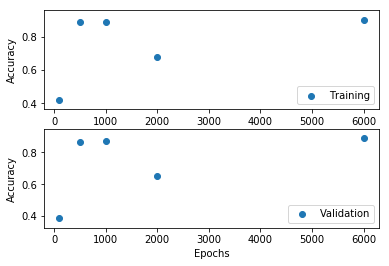

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

figure = plt.figure()

ax1 = figure.add_subplot(211)
plt.scatter(epochs, train_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Training'])

ax1 = figure.add_subplot(212)
plt.scatter(epochs, test_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Validation'])

plt.show()